# Feature creation - Numerical features ( Feature Transformation )

3. Cube root transformation

Imagine you're measuring the amount of water in different oddly shaped containers. Some containers might hold a little bit, some a decent amount, and a few very large ones could hold a huge volume.

If you were to compare these volumes directly, the really big ones would overshadow the smaller ones, making it hard to see the differences among the less voluminous containers.

Cube root transformation is like using a special lens that helps us see the differences in the smaller volumes more clearly, while shrinking down the really, really huge volumes even more than the square root does.

Think of it like this:

1. The cube root of 8 is 2 (because 2 x 2 x 2 = 8).
2. The cube root of 27 is 3 (because 3 x 3 x 3 = 27).
3. The cube root of 1000 is 10 (because 10 x 10 x 10 = 1000).
4. The cube root of 1,000,000 is 100 (because 100 x 100 x 100 = 1,000,000).

Notice how the gaps between the numbers get compressed even more with the cube root compared to the original numbers.

Here's a simple example with water volume (in liters):

Let's say we have the following volumes of water in different containers:

8

27

64

125

1000

Now, let's apply the cube root transformation to these volumes:

1. Cube root of 8 is 2
2. Cube root of 27 is 3
3. Cube root of 64 is 4
4. Cube root of 125 is 5
5. Cube root of 1000 is 10

See how the original numbers had increasingly larger gaps? After the cube root transformation, the gaps are now consistently 1 for the smaller numbers, and the large jump to 1000 is significantly reduced to 10.

Why is this useful?

Reduces the impact of extreme outliers even more: Compared to the square root, the cube root transformation is even stronger at bringing very large values closer to the rest of the data. This is especially helpful when you have some truly massive values that could really distort your analysis.

Helps to make skewed data more symmetrical: If your data has a very long tail on one side (meaning there are many small values and a few extremely large ones), the cube root can be very effective in making the distribution more balanced.

Can handle negative values: Unlike the square root (which doesn't work with negative real numbers), the cube root can be applied to negative numbers and will result in a negative number (e.g., the cube root of -8 is -2).

In simple terms, the cube root transformation is like an even stronger version of our "squishing" tool for data. It's particularly good at taming very extreme values and making highly skewed data look more balanced, allowing us to see patterns more clearly without being overwhelmed by the giants in our dataset. It's like adjusting the focus so we can see both the pebbles and the boulders without the boulders completely blurring everything else.





# 1. Import necessary libraries

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Create dataset

In [102]:
# 1. Real-life Example: Population Density of Cities (People per sq km)

# Imagine you have data on the population density of various cities.
# This data can have a wide range, with some sparsely populated areas and a few
# extremely densely populated megacities.

population_density = [
    1500, 2200, 1800, 3000, 2500, 1000, 500, 6000, 4500, 1200,
    2000, 2800, 1600, 3500, 2100, 800, 700, 12000, 9000, 1500,
    2500, 3100, 1900, 4000, 2700, 1100, 900, 18000, 7500, 2200,
    3000, 2600, 1400, 4200, 2300, 1300, 600, 24000, 5000, 1800,
    # Imagine more cities with densities in the thousands
]

# 3. Add skewed datapoints to the dataset

In [103]:
# Let's add some megacities with very high population densities
population_density += [50000, 100000, 250000, 800000]

In [104]:
# Create a Pandas Series
population_density_original = pd.Series(population_density + list(np.random.randint(500, 10000, 90)) + list(np.random.randint(10000, 50000, 10)),name='Original Population Density')

# 4. Visualize the Population Density

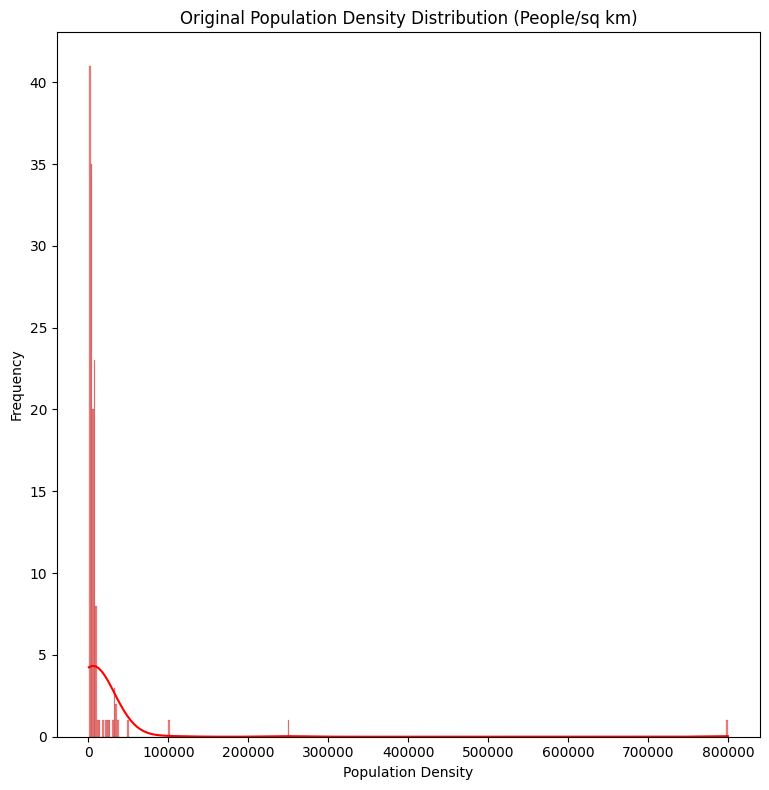

In [105]:
# Visualize the original distribution
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.histplot(population_density_original, kde=True , color = 'Red')
plt.title('Original Population Density Distribution (People/sq km)')
plt.xlabel('Population Density')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Most values are lesser than 100000

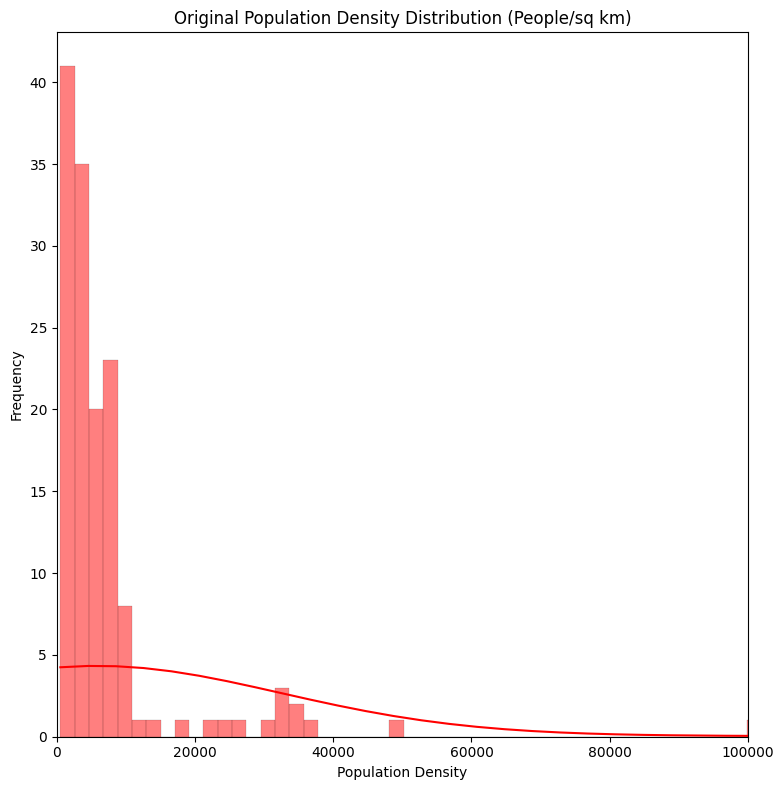

In [106]:
# Visualize till 1 lakh
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.histplot(population_density_original, kde=True , color='Red')
plt.title('Original Population Density Distribution (People/sq km)')
plt.xlabel('Population Density')
plt.ylabel('Frequency')
plt.xlim(0, 100000)  # Adjust this limit as needed based on your data
plt.tight_layout()
plt.show()

# 5. Feature transformation using cube root transformation

In [107]:
# Apply Cube Root Transformation (using numpy.cbrt)
population_density_cbrt = np.cbrt(population_density_original)

In [108]:
cbrt_transformed_density = pd.Series(population_density_cbrt, name='cbrt of population density')

# 6. Visualize the Square root transformed feature

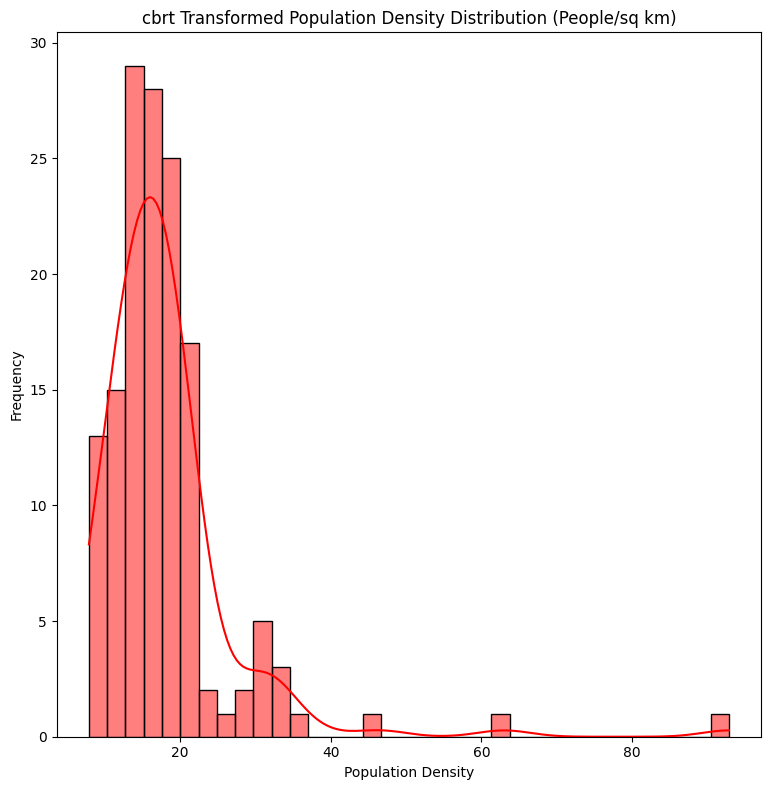

In [109]:
# Visualize the transformed distribution
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 2)
sns.histplot(cbrt_transformed_density, kde=True , color='Red')
plt.title('cbrt Transformed Population Density Distribution (People/sq km)')
plt.xlabel('Population Density')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Inference : The cube root transformation has likely made the distribution of population density less skewed and potentially closer to a normal distribution by compressing the higher values.

Mathematical Form: y' = y^(1/3)

When to Use:

1. Data with Both Positive and Negative Values: Unlike log and square root, the cube root is defined for both positive and negative numbers.
2. Reducing Skewness (including left skew to some extent): Can handle more severe skewness than the square root but less than the log for positive data. 3. It can also help with left-skewed data by stretching the lower tail.

How it Helps:

1. Reducing Skewness: Makes the distribution more symmetric.
2. Can Handle Negative Values: A key advantage over log and square root when dealing with data that can be negative.

Important Considerations:

Interpretation: Interpretation remains in a transformed scale.

# 7. Comparing the 2 columns

In [110]:
# Create DataFrame using pd.concat()
df_concat = pd.concat([population_density_original, cbrt_transformed_density], axis=1 )
df_concat

,Original Population Density,cbrt of population density
0,1500,11.447142
1,2200,13.005914
2,1800,12.164404
3,3000,14.422496
4,2500,13.572088
...,...,...
139,32699,31.977523
140,32371,31.870243
141,34525,32.562012
142,30624,31.286283


So while considering in a model we should consider the 'cbrt of population density' column